NOTE - The Dataset used in this workshop was updated recently from Kaggle, here are the things changed since the live workshop.

The filename of the dataset has been updated, the new filename is './us-accidents/US_Accidents_Dec20_updated.csv'. Please change the filename if you are getting errors while creating the dataframe.
The "Source" column is removed from the updated dataset. Any mention of "Source" in this notebook can be ignored while using the updated dataset.
US Accidents Exploratory Data Analysis
TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

Kaggle
informaiton about accidents
can use useful to prevent accidents
mention that this does not contain data about New York

In [28]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prajwalk7
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 157MB/s]


In [3]:
import os
os.getcwd()

'/content'

In [4]:
os.chdir('./us-accidents')

In [5]:
os.listdir('.')

['US_Accidents_Dec21_updated.csv']

### Data Preparation and Cleaning

1. Loading the file using Pandas
2. Look at what the data looks like and the columns given
3. Fix any missing or incorrect values

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [8]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.shape

(2845342, 47)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
df.describe(include = 'all')

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,2845342,2.845342e+06,2845342,2845342,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2845342,...,2845342,2845342,2845342,2845342,2845342,2845342,2842475,2842475,2842475,2842475
unique,2845342,NaN,1959333,2351505,NaN,NaN,NaN,NaN,NaN,1174563,...,2,2,2,2,2,1,2,2,2,2
top,A-1,NaN,2021-01-26 16:16:13,2021-11-22 08:00:00,NaN,NaN,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,NaN,214,88,NaN,NaN,NaN,NaN,NaN,7978,...,2845219,2777347,2794942,2843630,2580079,2845342,1811935,1929103,2063472,2176983
mean,NaN,2.137572e+00,NaN,NaN,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.787216e-01,NaN,NaN,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000e+00,NaN,NaN,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.000000e+00,NaN,NaN,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
numeric_cols = df.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [14]:
len(numeric_cols.columns)

14

In [15]:
len(df.columns)

47

Percentage of missing values per column

In [16]:
missing_percentages = (df.isna().sum().sort_values(ascending = True) / len(df)) * 100

In [17]:
missing_percentages

ID                        0.000000
Crossing                  0.000000
Give_Way                  0.000000
Junction                  0.000000
No_Exit                   0.000000
Railway                   0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Traffic_Signal            0.000000
Turning_Loop              0.000000
Country                   0.000000
Amenity                   0.000000
State                     0.000000
End_Lng                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
County                    0.000000
Bump                      0.000000
Description               0.000000
Side                      0.000000
Distance(mi)              0.000000
Street                    0.000070
City                

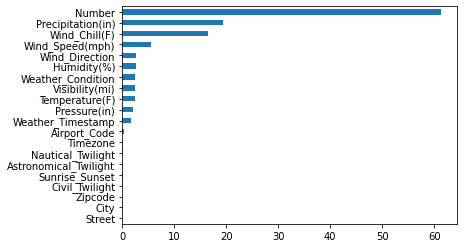

In [18]:
missing_percentages[missing_percentages > 0].plot(kind = 'barh');

Removing columns that are not required and analysing a few of the columns:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [19]:
len(df['City'].unique())

11682

In [20]:
df['City'].value_counts()[:25]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Tucson           13799
San Jose         13377
Riverside        13310
Kansas City      13298
Bakersfield      12044
Name: City, dtype: int64

In [21]:
[x in df.City for x in ['NY', 'NYC', 'New York', 'New York City']]

[False, False, False, False]

Despite NY being the most populous city in US, it is not the top cities with most accidents because there is no data available.

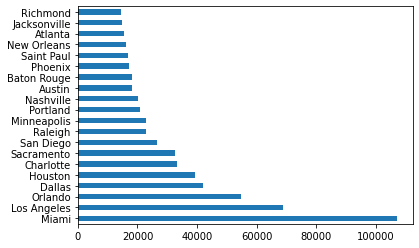

In [22]:
df['City'].value_counts()[:20].plot(kind = 'barh');

In [23]:
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


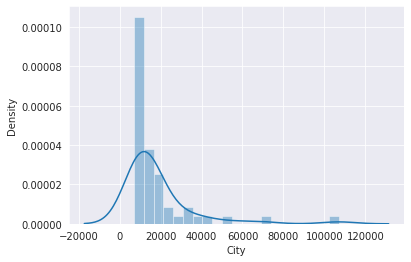

In [24]:
sns.distplot(df['City'].value_counts()[:50]);

In [25]:
high_accident_cities = df['City'].value_counts()[df['City'].value_counts() >= 1000]
low_accident_cities = df['City'].value_counts()[df['City'].value_counts() > 1000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


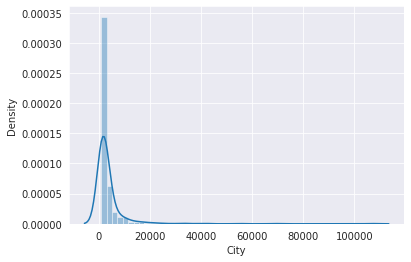

In [56]:
sns.distplot(high_accident_cities);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


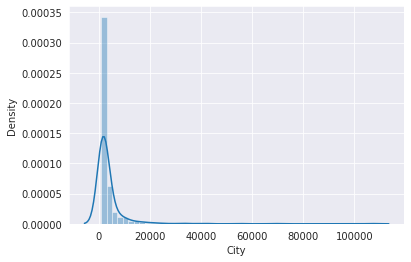

In [55]:
sns.distplot(low_accident_cities);

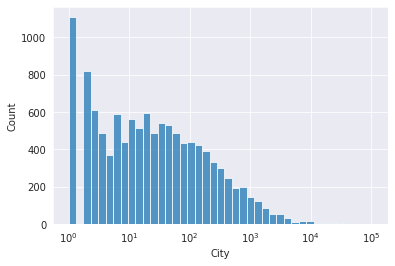

In [54]:
sns.histplot(df['City'].value_counts(), log_scale = True);

In [30]:
df['City'].value_counts()[df['City'].value_counts() == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [31]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [40]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [43]:
df['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

In [44]:
df['Start_Time'][0].hour

0

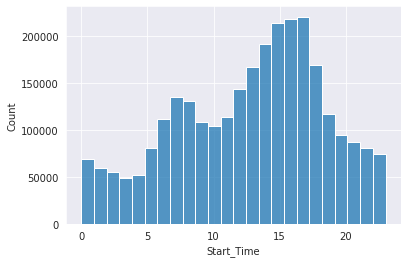

In [53]:
sns.histplot(df['Start_Time'].dt.hour, bins = 24);

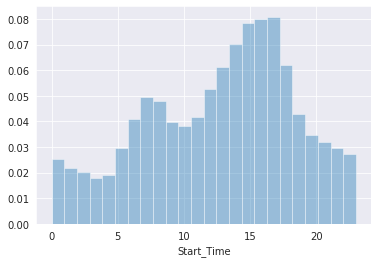

In [51]:
sns.distplot(df['Start_Time'].dt.hour, bins = 24, kde = False, norm_hist = True);

- A high percentage of accidents occur between 6 AM to 9 AM (probably people in a hurry to get to work) and most of the accidents occure between 2 PM to 6 PM (probably because of the high influx of traffic post work)


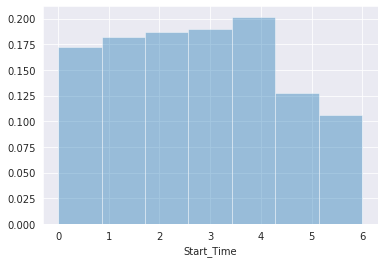

In [50]:
sns.distplot(df['Start_Time'].dt.day_of_week, bins = 7, kde = False, norm_hist = True);

Saturdays and Sundays have fewe accidents

In [59]:
df['Start_Time'][(df['Start_Time'].dt.day_of_week == 6)]

154       2016-02-14 03:58:33
155       2016-02-14 05:26:58
156       2016-02-14 16:30:40
157       2016-02-14 16:38:40
158       2016-02-14 17:40:17
                  ...        
2843129   2019-08-18 22:48:14
2843130   2019-08-18 23:24:10
2843243   2019-08-18 22:56:56
2843244   2019-08-18 22:56:56
2843282   2019-08-18 22:54:41
Name: Start_Time, Length: 259274, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


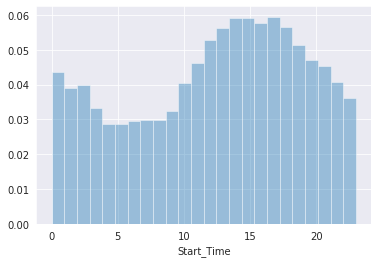

In [66]:
sns.distplot((df.Start_Time[df.Start_Time.dt.dayofweek == 6].dt.hour), kde = False, bins = 24, norm_hist = True);

The number of accidents by the hour is more spread out on Sundays

In [69]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

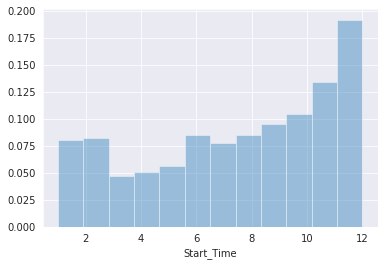

In [83]:
sns.distplot((df.Start_Time[df.Start_Time.dt.year == 2021].dt.month), kde = False, bins = 12, norm_hist = True);

It looks like most of the accidents occur during the last quarter of the year (and in some years during the first couple of months of the year), while the accident rate remains constant across months Jan to Sept. This might be because of the winter season, during which the cities experience rain, snow and the drivers suffer from reduced visibility and slippery roads. Also, more people travel during December (month with highest accidents) on account of holidays.

In [85]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [86]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

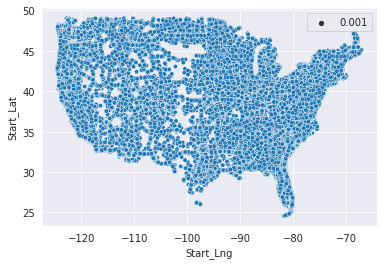

In [89]:
sns.scatterplot(y = df.Start_Lat, x = df.Start_Lng, size = 0.001)

In [90]:
import folium

In [92]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
print(lat, lon)

40.10891 -83.09286


In [94]:
map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [95]:
from folium.plugins import HeatMap

In [96]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [101]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [102]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.